This is meant to be a simple application of PCA to demonstrate how it can reduce the dimensionality of a higher order data-set to 2/3 dimensions

For doing the actual analysis, we use sklearn.decomposition.PCA and use it as a blackbox for all practical purposes. It uses Singular Value Decomposition to reduce the dimensionality of the data.

I downloaded the data from https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data. The IRIS data-set is a very standard ML data-set lile MNIST and contains data on flowers such as sepal length, sepal width etc. and type. Now we try to separate out these different classes of flowers using just 2 principal components. 

**Loading the Data**

In [73]:
import pandas as pd 
import numpy as np
import pylab as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [84]:
basedir = './'
data = np.genfromtxt(basedir + 'iris_data.txt',delimiter=',',names=True,usecols=(0,1,2,3))
data_target = plt.genfromtxt(basedir + 'iris_data.txt',delimiter=',',usecols=(4),dtype='string',skip_header=1)

data_prep = np.array([data["sepal_length"],data["sepal_width"],data["petal_length"],data["petal_width"]])
data_prep = data_prep.transpose()   #Transpose the matrix to make it into proper dimensions for standardization

**Standardizing the Data**

Now we standardize the data as the iris dataset was measured on different scales. We conntinue with the transformation of the data onto unit scale (mean=0 and variance=1)

In [88]:
data_std = StandardScaler().fit_transform(data_prep)

**Applying PCA**

In [90]:
pca = PCA(n_components=2)  
principal_comp = pca.fit_transform(data_std)

In [94]:
principal_comp = principal_comp.transpose()   #Transposing the array so that it's easy to correspond this data to the targets again

**Visualization of the Data in Reduced Dimensions**

Now, we plot entire data-set with the two principal components as the X and Y axis and with the different target-types as different colours

In [107]:
red_x = []
red_y = []
blue_x = []
blue_y = []
green_x = []
green_y = []

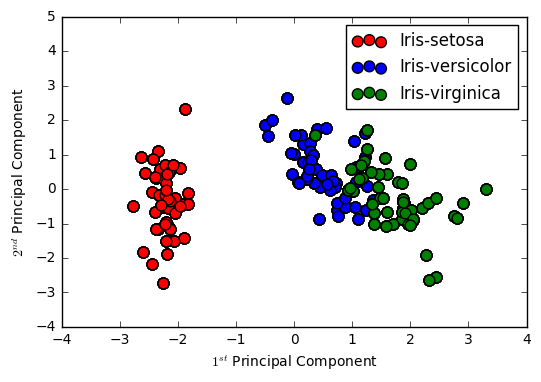

In [116]:
for i,target in enumerate(data_target):
    
    if target == 'Iris-setosa':
        red_x.append(principal_comp[0][i])
        red_y.append(principal_comp[1][i])
    
    elif target == 'Iris-versicolor':
        blue_x.append(principal_comp[0][i])
        blue_y.append(principal_comp[1][i])
        
    else:
        green_x.append(principal_comp[0][i])
        green_y.append(principal_comp[1][i])
        
plt.scatter(red_x,red_y,c='r',s=60,label='Iris-setosa')
plt.scatter(blue_x,blue_y,c='b',s=60,label='Iris-versicolor')
plt.scatter(green_x,green_y,c='g',s=60,label='Iris-virginica')
plt.xlabel("$1^{st}$ Principal Component")
plt.ylabel("$2^{nd}$ Principal Component")
plt.legend(loc='best')
plt.ylim([-4,5])
plt.show()